In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [46]:
X = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [47]:
y = data['Class']

<h3>Oversampling using SMOTETomek</h3>

In [7]:
from imblearn.combine import SMOTETomek 

In [14]:
smk = SMOTETomek(random_state=42)
X, y = smk.fit_sample(X,y)

In [15]:
X.shape, y.shape 

((567562, 30), (567562,))

<h3>Oversampling using RandomOverSampler</h3>

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
ros = RandomOverSampler(0.5)
X, y = ros.fit_sample(X,y)  

C:\Users\f5021308\AnacondaNew\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [57]:
X.shape, y.shape

((426472, 30), (426472,))

<h3>Model Building</h3>

In [16]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [67]:
from sklearn.ensemble import RandomForestClassifier 

In [68]:
model = RandomForestClassifier()

In [69]:
model.fit(X_train, y_train) 

RandomForestClassifier()

In [70]:
y_pred = model.predict(X_test) 

In [63]:
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_score, recall_score

In [71]:
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred)) 

Precision:  0.9998128873815928
Recall:  1.0


In [72]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85195
           1       1.00      1.00      1.00     42747

    accuracy                           1.00    127942
   macro avg       1.00      1.00      1.00    127942
weighted avg       1.00      1.00      1.00    127942



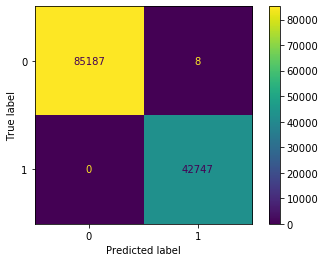

In [73]:
plot_confusion_matrix(model, X_test, y_test) 